<a href="https://colab.research.google.com/github/fun-math/Team-6-ML-subsystem/blob/master/Model1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
import os

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
shapes=['torus','cone','cylinder','cuboid','sphere']
colours=['Red','Grey','Brown','Green']
h=48
b=64

# Initial Data Processing

In [ ]:
%cd '/content/drive/My Drive/Images'

/content/drive/My Drive/Images


In [ ]:
def load(img_name):
  img=cv2.imread(img_name,0)
  img=cv2.resize(img,(960,540))
  img_new=img[106:488,245:754]
  img_new=cv2.resize(img_new,(b,h))
  img_new=img_new.reshape(h,b,1)
  return img_new


In [ ]:
m_train=100000
m_valid=20000

In [ ]:
train_data_gen=ImageDataGenerator(
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=50,                                                
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True                       
)

valid_data_gen=ImageDataGenerator(
    rotation_range=50,                                                
    zoom_range=[0.6,1.1],
    horizontal_flip=True,
    vertical_flip=True                       
)

sphere_data_gen=ImageDataGenerator(
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=50,                                                
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True                       
)

In [ ]:
X_train=np.zeros([m_train,h,b,1])
y_train=np.zeros([m_train,1])

img_ind=0
for shape in shapes:
  if shape=='torus':
    m=0
    for colour in colours :
      filenames=glob.glob('Torus_'+colour+'/*.png')
      m+=len(filenames)

    train_X=np.zeros([m,h,b,1])
    train_y=np.zeros([m,1])

    ind=0
    for i in range(4):
      filenames=glob.glob('Torus_'+colours[i]+'/*.png')
      for image_name in filenames :
        train_X[ind]=load(image_name)
        train_y[ind]=0
        ind+=1

  else :
    m=0
    filenames=glob.glob(f'{shape}/*.png')
    m=len(filenames)

    train_X=np.zeros([m,h,b,1])
    train_y=np.zeros([m,1])

    ind=0
    for image_name in filenames :
       train_X[ind]=load(image_name)
       train_y[ind]=1
       ind+=1
  

  factor=int(m_train/(8*m))
  if shape=='sphere':
    for i in range(factor):                                                    
      it=sphere_data_gen.flow(train_X,train_y,batch_size=m)                        
      temp=next(it)
      X_train[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_train[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]

  else :
    if shape=='torus':
      factor=int(m_train/(2*m))
    for i in range(factor):                                                    
      it=train_data_gen.flow(train_X,train_y,batch_size=m)                        
      temp=next(it)
      X_train[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_train[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]
  
  
  img_ind+=m*factor



In [ ]:
X_valid=np.zeros([m_valid,h,b,1])
y_valid=np.zeros([m_valid,1])

img_ind=0
for shape in shapes:
  if shape=='torus':
    m=0
    for colour in colours :
      filenames=glob.glob('Torus_'+colour+'/*.png')
      m+=len(filenames)

    valid_X=np.zeros([m,h,b,1])
    valid_y=np.zeros([m,1])

    ind=0
    for i in range(4):
      filenames=glob.glob('Torus_'+colours[i]+'/*.png')
      for image_name in filenames :
        valid_X[ind]=load(image_name)
        valid_y[ind]=0
        ind+=1

  else :
    m=0
    filenames=glob.glob(f'{shape}/*.png')
    m=len(filenames)

    valid_X=np.zeros([m,h,b,1])
    valid_y=np.zeros([m,1])

    ind=0
    for image_name in filenames :
       valid_X[ind]=load(image_name)
       valid_y[ind]=1
       ind+=1
  

  factor=int(m_valid/(8*m))
  if shape=='sphere':
    for i in range(factor):                                                    
      it=sphere_data_gen.flow(valid_X,valid_y,batch_size=m)                        
      temp=next(it)
      X_valid[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_valid[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]

  else :
    if shape=='torus':
      factor=int(m_valid/(2*m))
    for i in range(factor):                                                    
      it=valid_data_gen.flow(valid_X,valid_y,batch_size=m)                        
      temp=next(it)
      X_valid[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_valid[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]
  
  
  img_ind+=m*factor



In [ ]:
pos=np.arange(len(y_train))
np.random.shuffle(pos)          
X_train=X_train[pos]
y_train=y_train[pos]

pos=np.arange(len(y_valid))
np.random.shuffle(pos)          
X_valid=X_valid[pos]
y_valid=y_valid[pos]

In [ ]:
%cd '/content/drive/My Drive/Project_Data/Task_1a'

np.save('X_train',X_train)
np.save('y_train',y_train)
np.save('X_valid',X_valid)
np.save('y_valid',y_valid)

/content/drive/My Drive/Project_Data/Task_1a


# Load processed data

In [3]:
%cd '/content/drive/My Drive/Project_Data/Task_1a'

X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_valid=np.load('X_valid.npy')
y_valid=np.load('y_valid.npy')

/content/drive/.shortcut-targets-by-id/1deNr7eN1qDWU-XvAQGWtSZn6meE_WHre/Project_Data/Task_1a


# Quick peek into some examples

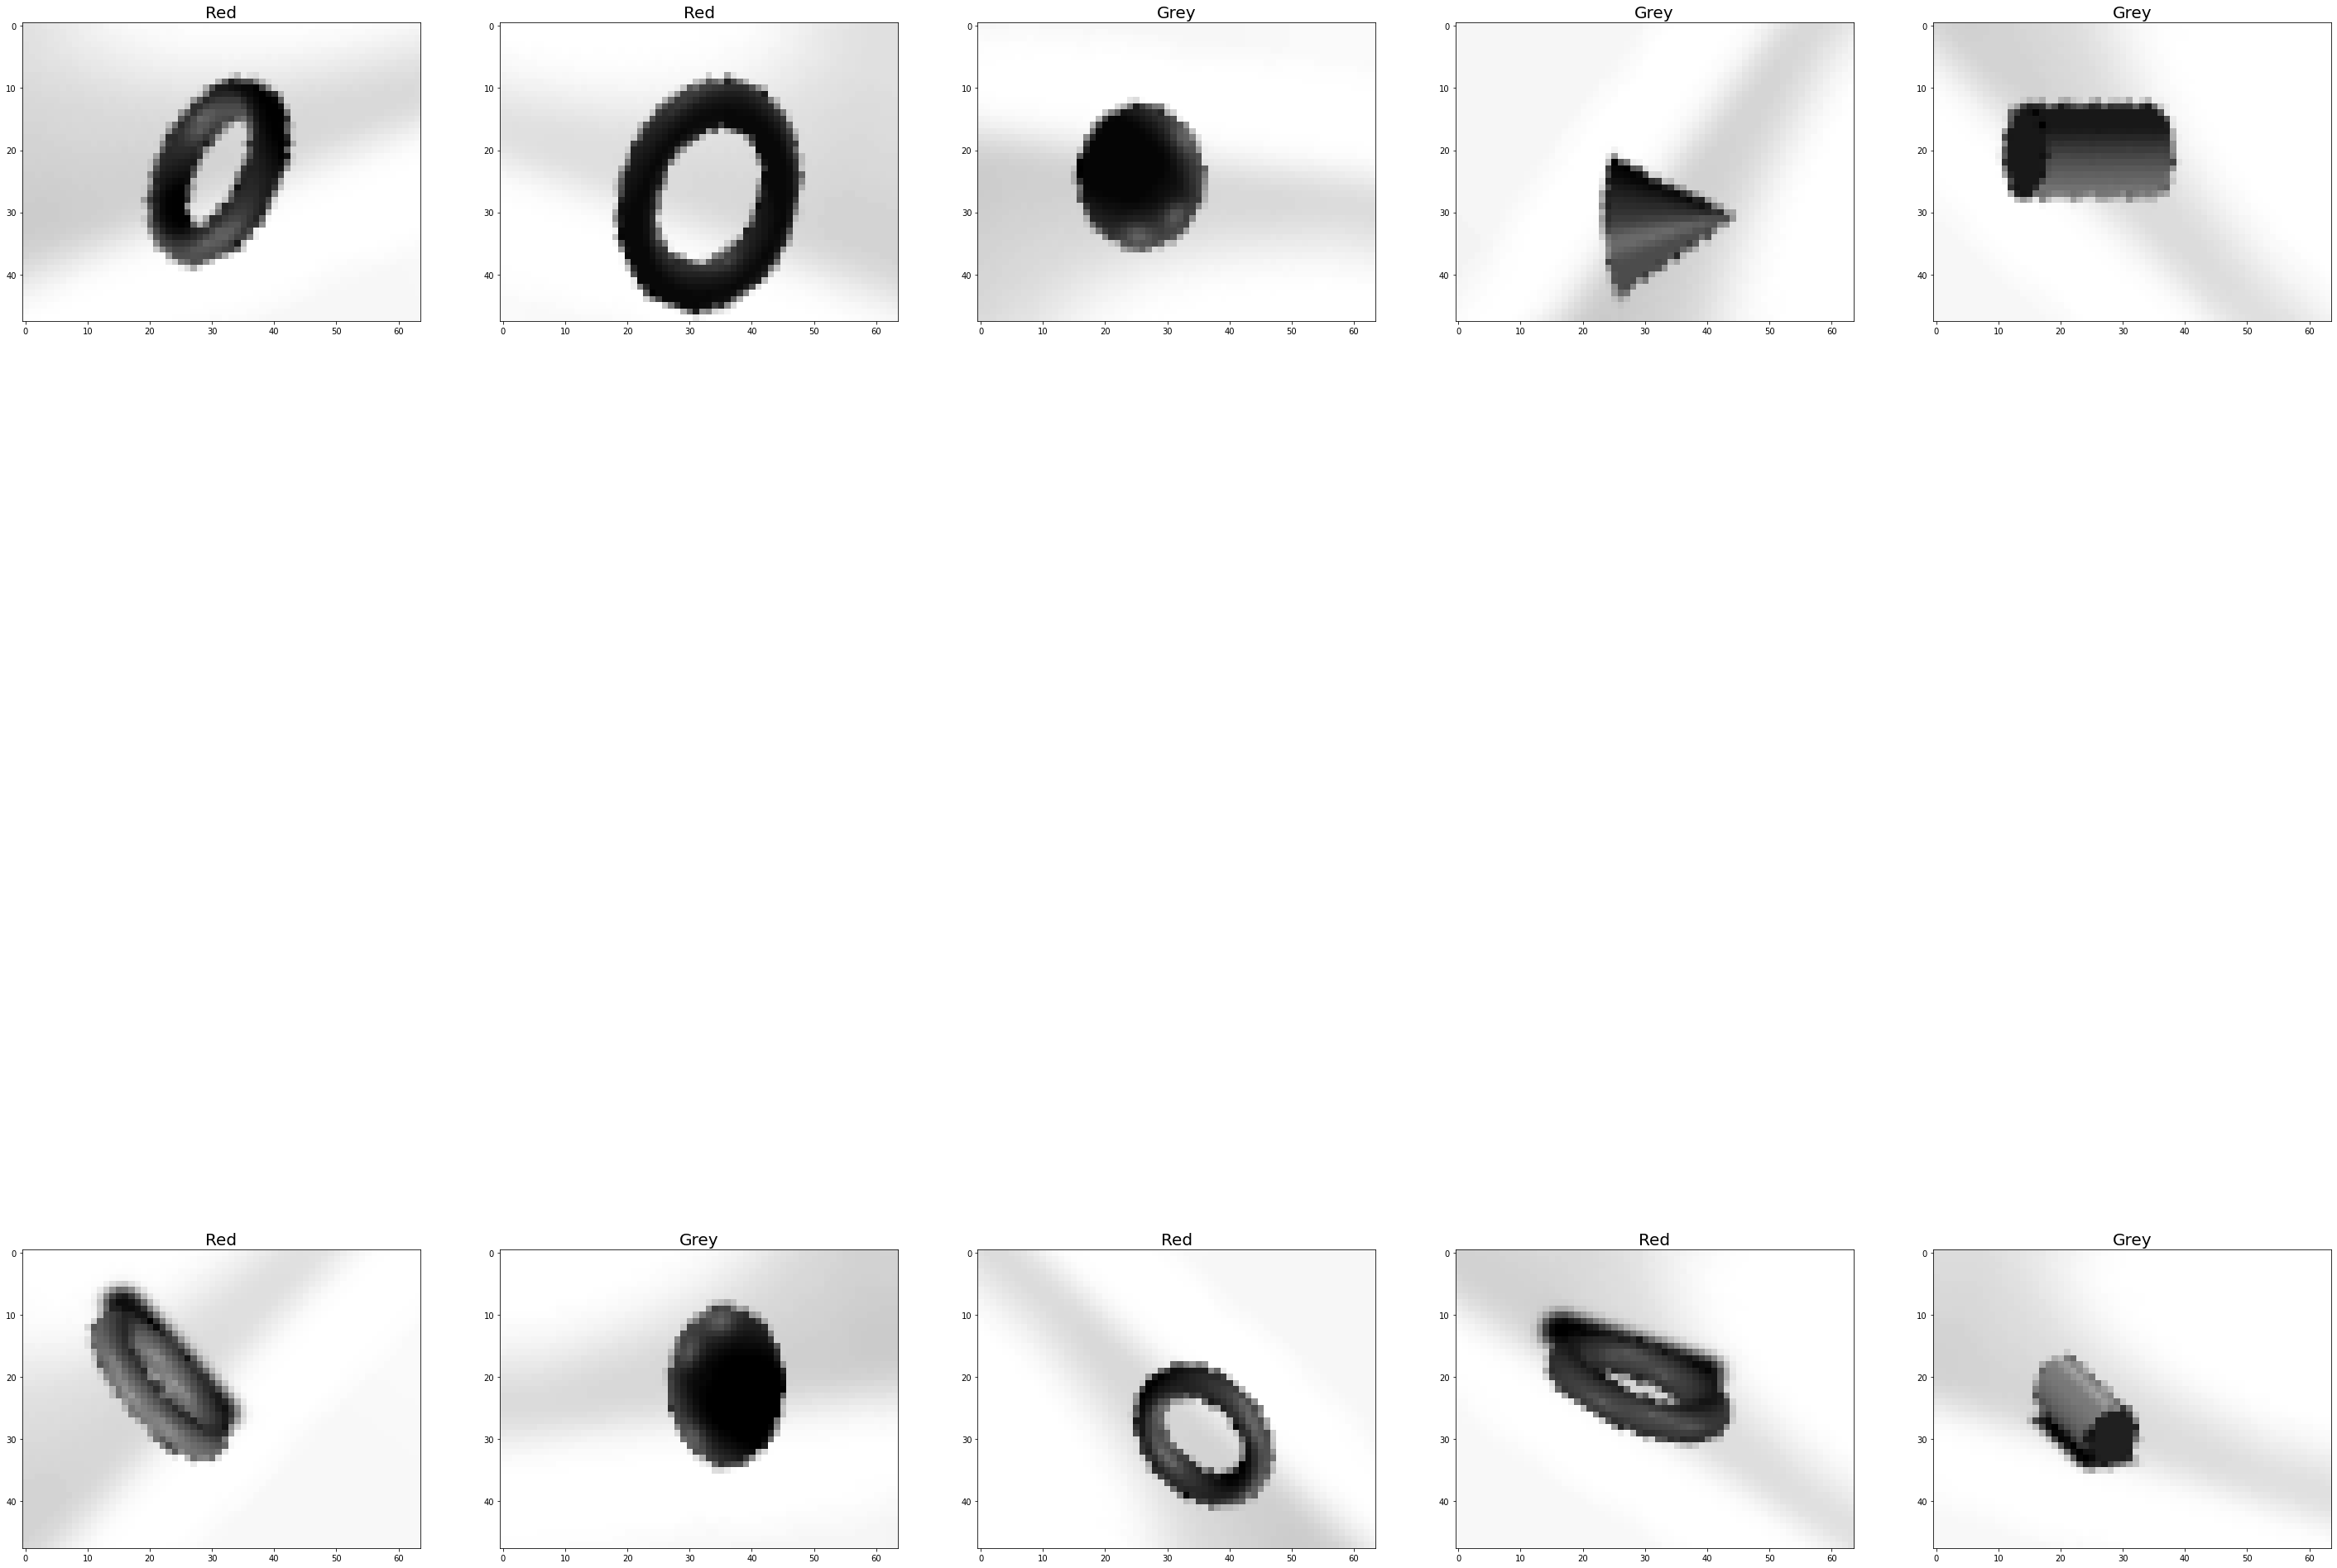

In [ ]:
fig=plt.figure(figsize=(50,50))   
for i in range(10):
  startind=6000
  sub=fig.add_subplot(2,5,i+1)
  img=X_train[i+startind].copy()
  img=img.reshape((h,b))
  sub.imshow(img.astype(np.uint8),cmap='gray')
  #temp=y_train[i]
  plt.title(int(y_train[i+startind]),fontsize=20)        
plt.show()

# Building and training the model

In [4]:
X_train=X_train/255.0
X_valid=X_valid/255.0

In [5]:
inputs=tf.keras.Input(shape=(h,b,1))

x=Conv2D(16,3,1,padding='same',activation='relu')(inputs)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(32,3,1,padding='same',activation='relu')(x)
x=Conv2D(32,3,1,padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(64,3,1,padding='same',activation='relu')(x)
x=Conv2D(64,3,1,padding='same',activation='relu')(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(128,3,1,padding='same',activation='relu')(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Flatten()(x)
output=Dense(2,activation='softmax')(x)

model=tf.keras.Model(inputs,output,name='model1a')

model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model1a"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 64, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 16, 32)        0   

In [6]:
epochs=20
history=model.fit(X_train,
                  y_train,
                  batch_size=64,
                  epochs=epochs,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1544 - accuracy: 0.9503 - val_loss: 0.1289 - val_accuracy: 0.9536
Epoch 2/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0669 - accuracy: 0.9735 - val_loss: 0.1154 - val_accuracy: 0.9624
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0452 - accuracy: 0.9834 - val_loss: 0.0724 - val_accuracy: 0.9757
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.0668 - val_accuracy: 0.9786
Epoch 5/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0498 - val_accuracy: 0.9840
Epoch 6/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0647 - val_accuracy: 0.9817
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0470 - val_ac

Text(0.5, 1.0, 'Training and Validation Accuracy')

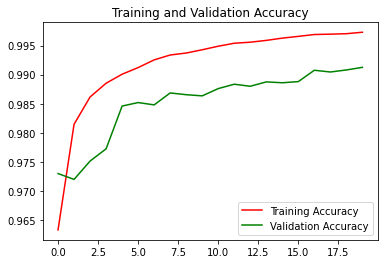

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs_range=range(epochs)
plt.plot(epochs_range, acc, label='Training Accuracy',color='red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color='green')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [7]:
model.evaluate(X_valid,y_valid)

625/625 [==============================] - 2s 3ms/step - loss: 0.0255 - accuracy: 0.9927


[0.025464346632361412, 0.9927499890327454]

In [8]:
predictions=model.predict(X_valid).astype(float)
tf.math.confusion_matrix(y_valid.reshape(len(y_valid),),np.argmax(predictions,axis=1))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9873,  127],
       [  18, 9982]], dtype=int32)>

In [9]:
%cd '/content/drive/My Drive/Project_Data/Task_1a'
model.save("model1a_9927.h5")

/content/drive/.shortcut-targets-by-id/1deNr7eN1qDWU-XvAQGWtSZn6meE_WHre/Project_Data/Task_1a
